# Multiple Linear Regression

Linear regression is a technique for predicting a real value. Confusingly, these problems where a real value is to be predicted are called regression problems. Linear regression is a technique where a straight line is used to model the relationship between input and output values. In more than two dimensions, this straight line may be thought of as **a plane or hyperplane**.

Predictions are made as a combination of the input values to predict the output value. Each input attribute (x) is weighted using a coefficient (b), and the goal of the learning algorithm is to discover a set of coefficients that results in good predictions (y). Coefficients can be found using **gradient descent**.

In Simple Linear Regression, we used a statistical approach to find the coefficients. Here we will employ an iterative algorithm. Gradient Descent is the process of minimizing a function by following the gradients of the cost function. This involves knowing the form of the cost as well as the derivative so that from a given point you know the gradient and can move in that direction, e.g. downhill towards the minimum value.

In machine learning, we can use a technique that evaluates and updates the coefficients every iteration called stochastic gradient descent to minimize the error of a model on our training data. The way this optimization algorithm works is that each training instance is shown to the model one at a time. The model makes a prediction for a training instance, the error is calculated and the model is updated in order to reduce the error for the next prediction. This process is repeated for a fixed number of iterations.

## Exercise 1 - Explore the Data

After we develop our linear regression algorithm with gradient descent, we will use it to model the wine quality dataset. This dataset is comprised of the details of 4,898 white wines including measurements like acidity and pH. The goal is to use these objective measures to predict the wine quality on a scale between 0 and 10. You can learn more about the dataset on the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Wine+Quality).

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('winequality-white.csv', delimiter=';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


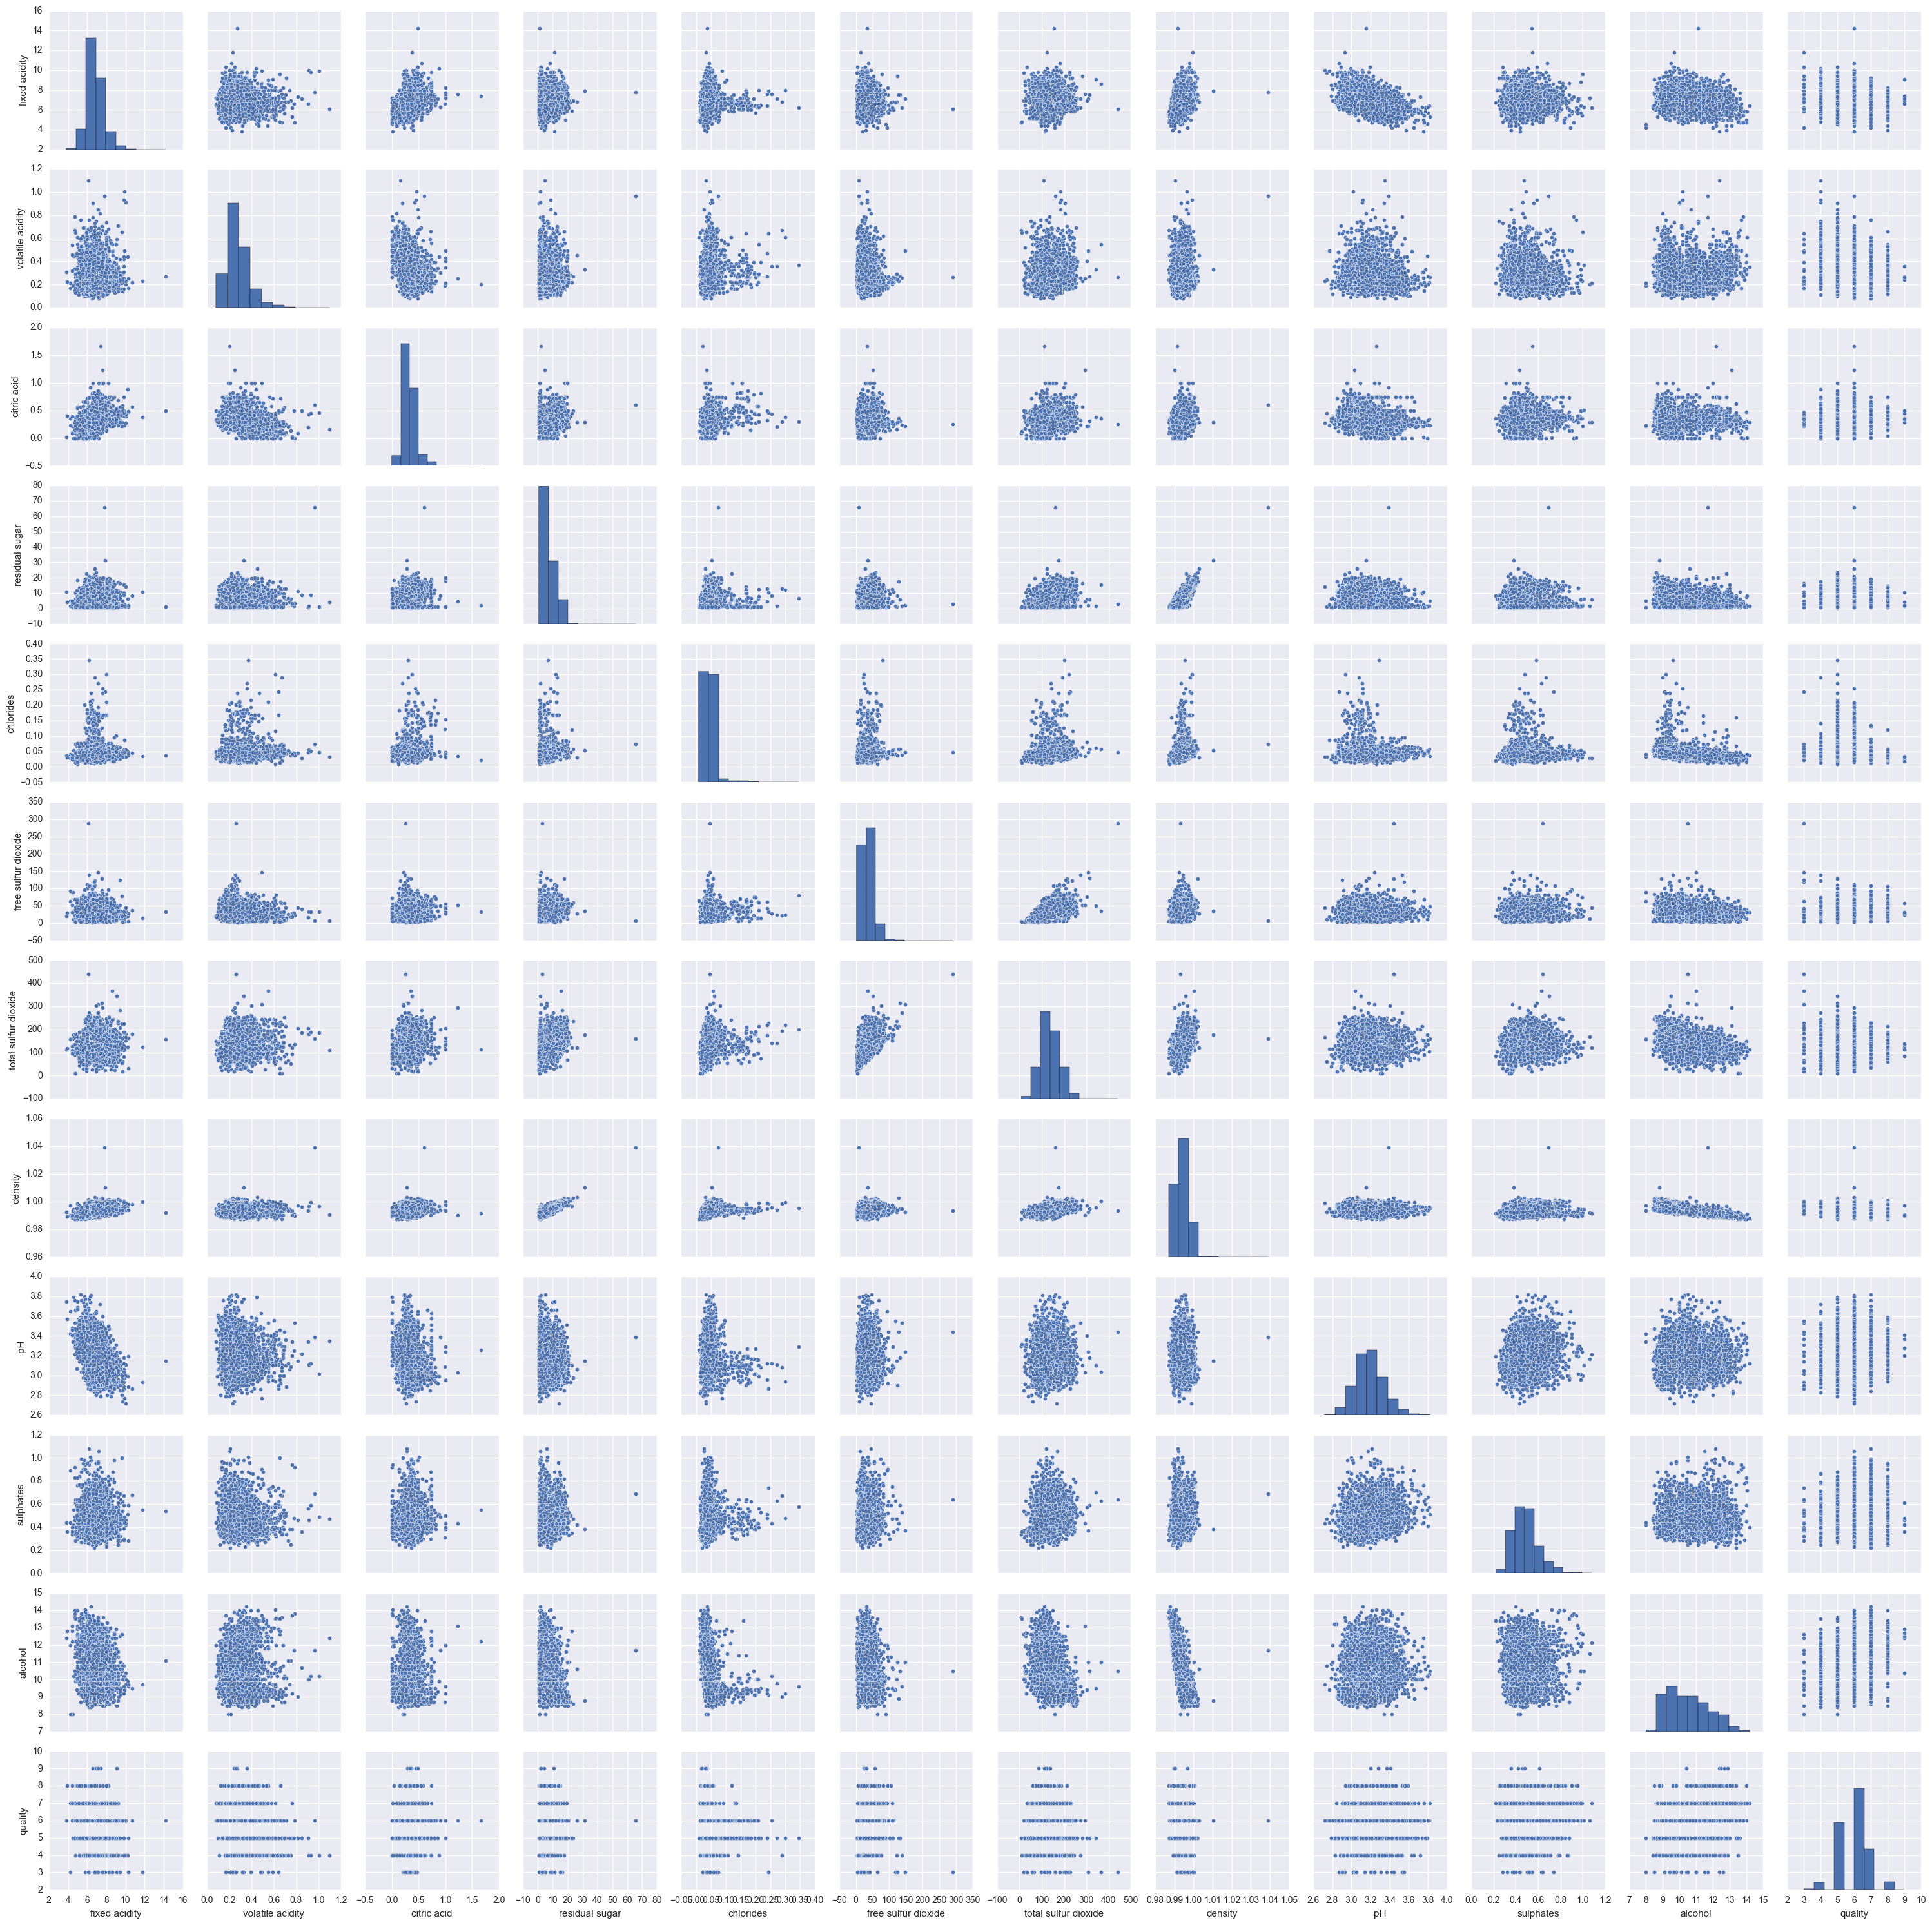

In [6]:
import seaborn as sns
sns.pairplot(df)

In [7]:
df=df.dropna(how='any')

## Exercise 2 - Build Multiple Linear Regression 

For more information on the derivation, check out [these videos](https://www.coursera.org/learn/machine-learning/lecture/kCvQc/gradient-descent-for-linear-regression) or [this blog article](https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/).

The general steps are:
- Estimate coefficient values for the training data using gradient descent (try [batch, mini-batch or stochastic](http://sebastianruder.com/optimizing-gradient-descent/))
- Evaluate candidate coeffeicient values 
- Tune learning rate and number of epochs
- Make predictions on out-of-sample data

The class or series of functions should do the following:
- Fit a set of X (wine measurements) and y (wine quality value)
- Predict new X based on the coefficients
- Return the coefficients and intercept

In [17]:
#solving the exercise with multivariate linear regression 
#code 1
class M_Linear_Regression():
    
    def __init__(self):
        pass
        
    def fit(self, X, y, nr_iterations, learning_rate):
        dim=len(X.T)
        m=len(X)
        #set the starting values for all beta parameters - starting value: 0
        beta=np.ones(dim)
        costs=[]
        for i in range(0, nr_iterations):
            error=np.dot(X,beta)  - y
            cost=(error**2).sum() / (2 * m)
            costs.append(cost)
            grad= np.dot(X.T, error)/m
            beta= beta- learning_rate *grad
            #print("Beta: {}, cost: {} ".format(beta, cost))            
        self.coef_=beta
        self.costs_=costs
        return beta
    
    def predict(self, X):
        return np.dot(X,self.coef_)
        
    def score(self, X, y):
        self.score_=1-(np.sum((y-self.predict(X))**2)/np.sum((y-np.mean(y))**2))
        return self.score_
    
    def plot_iterations(self):
        
        #print(self.costs_)
        try:
            plt.plot(self.costs_)
            plt.ylabel('Cost function')
            plt.xlabel('Iteration')
            plt.title('Change in the cost function during the iteration')
        except:
            print('You need to use the fit() method before plotting!')

## Exercise 3 - Try it out on the Wine Data Set

- Split the data into training and testing sets
- Calculate the appropriate error metric

In [10]:
X=df.drop('quality', axis=1)
y=df['quality']
X.insert(0, 'constant', 1)
X.head()

,constant,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [11]:
#shuffle data and split it to training avd test sample
#df=df.iloc[np.random.permutation(len(df))]
#train_data = df.iloc[:int(len(df)*0.70)] #70% to training sample
#test_data = df.iloc[int(len(df)*0.70):] #30% data to test sample

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [19]:
lr=M_Linear_Regression()
lr.fit(X_train.values, y_train.values,  10000000, 0.00001)

array([ 0.74929331, -0.06219371, -0.82308015,  0.28914364,  0.02252124,
        0.8730307 ,  0.00742516, -0.00175805,  0.74212642,  0.19436861,
        0.6474638 ,  0.36179611])

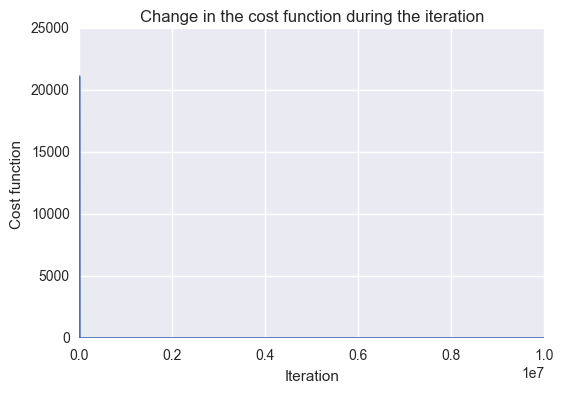

In [22]:
lr.plot_iterations()

In [23]:
lr.score(X_train.values, y_train.values)

0.25826917992611642

In [24]:
lr.score(X_test.values, y_test.values)

0.23849021441916252

## Exercise 4 - Check via Statsmodels or Scikit-learn

In [28]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     124.7
Date:                Fri, 28 Jul 2017   Prob (F-statistic):          8.20e-241
Time:                        13:16:16   Log-Likelihood:                -3895.2
No. Observations:                3428   AIC:                             7814.
Df Residuals:                    3416   BIC:                             7888.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
constant               131.0491 

# Additional Optional Exercises

- Proper documentation for class methods and attributes.
- Try additional values for learning rate and epochs. What happens if the learning rate is too large?
- How to tell when the algorithm has already coverged (tip: try to use relative values instead of absolute ones)? Add an optional parameter to stop iterating if it has already converged (or if it is diverging).
- Compare the analytical solution to Batch Gradient Descent and find an empirical threshold before and after which it would be better to use either one or the other approach.
- When would you use Mini-Batch or Stochastic Gradient Descent? Try implementing them.
- Can you write code that dinamically chooses an optimal learning rate given the data at hand?
- Read about [Total Error vs. Average Error](http://stats.stackexchange.com/a/155581)
- Try re-writing the code with NumPy's more usual `ndarray`s.
- Sort the dataset before separating it into training and test set and see how it performs.
- Try reducing the R2 metric by doing some feature engineering.
- Type A vs. Type B